In [1]:
import pandas

import matplotlib.pyplot as plot
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import t

from statsmodels.stats.proportion import proportion_confint

In [2]:
data = pandas.read_csv(r"heart_disease_uci.csv")

data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


-------------------------------------------------------------------------------------------------------------------------------
## Performing exploratory data analysis (EDA) to understand the distribution of variables, identify potential relationships, and detect any outliers or missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
# Check whether duplicates exists in the dataset. If it exists, then drop them. If not, then ignore and move on

print("Rows before removing duplicates: ", len(data))
duplicates = data.duplicated().sum()

if duplicates > 0:
    data = data.drop_duplicates()
    print("\nDuplicates found!\nRows after removing duplicates: ", len(data))
else:
    print("\nNo duplicate found!")

Rows before removing duplicates:  920

No duplicate found!


In [5]:
# Check whether missing data exists in the dataset. If it exists, then impute them. If not, then ignore and move on

missing = data.isnull().sum().sum() 

if missing > 0:
    print("Missing data: ", missing)
    for column in data.columns:
    #This line checks whether data type of the column is 'f' (float) or 'i' (integar)
        if data[column].dtype.kind in 'fi':
            data[column].fillna(data[column].median(), inplace=True)
        #This line checks whether data type of the column is 'O' (object or categorical)   
        elif data[column].dtype.kind in 'O':
            data[column].fillna(data[column].mode()[0], inplace=True)
    print("Missing data after imputation: ", data.isnull().sum().sum())
else:
    print("\nNo missing data found!")

Missing data:  1759
Missing data after imputation:  0


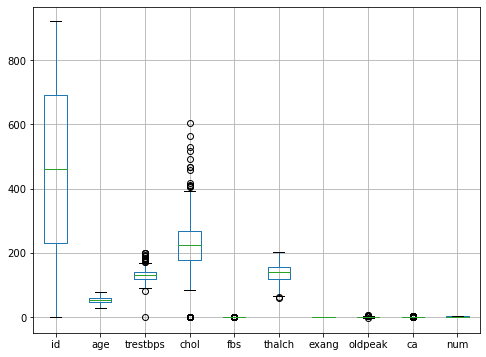

In [6]:
## Check whether outliers exists in the dataset

# A box plot shows where most of the data is condensed and circle represents the outleirs
plot.figure(figsize=(8, 6))
data.boxplot()
plot.show()

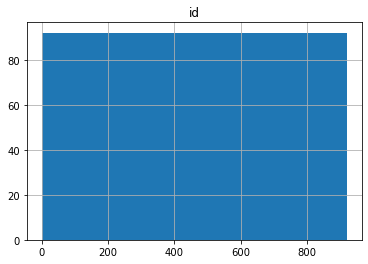

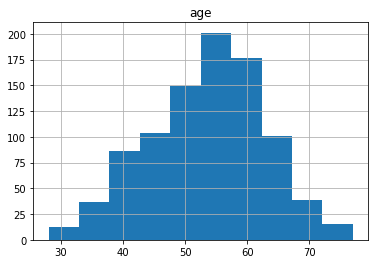

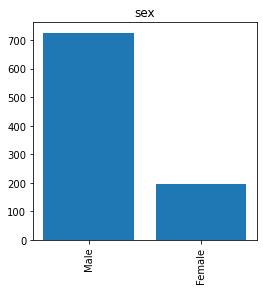

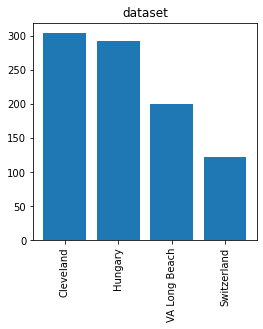

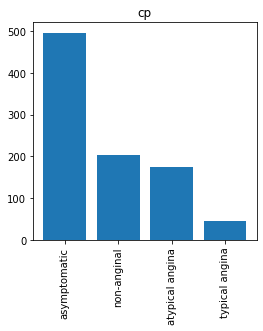

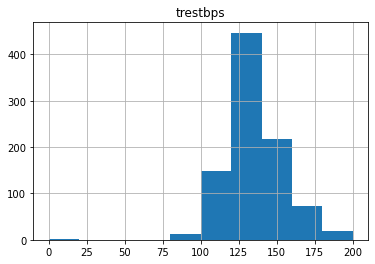

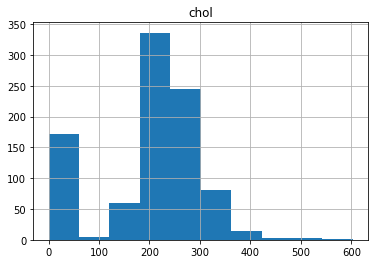

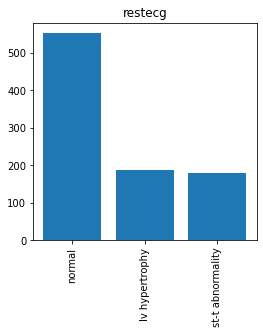

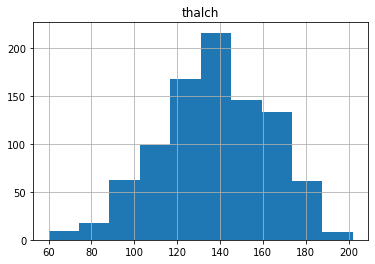

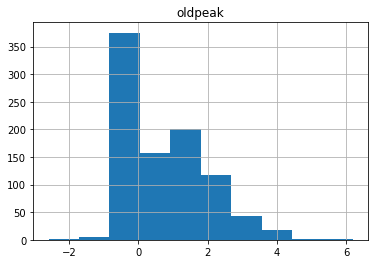

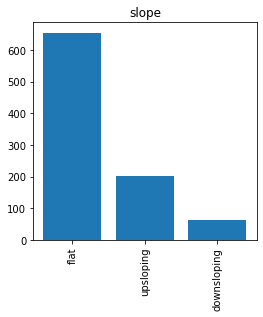

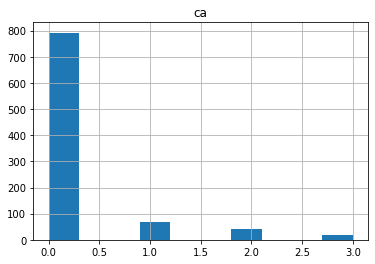

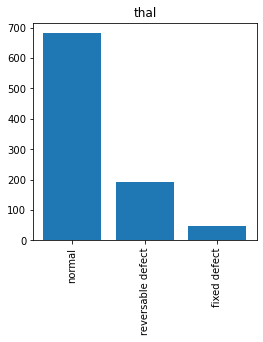

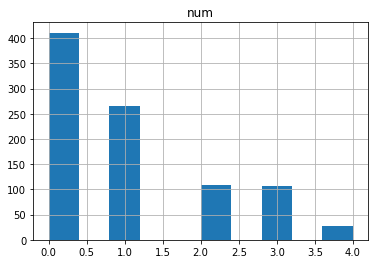

In [7]:
#Plotting each feature to check the distribution of it
for column in data.columns:
    if data[column].dtype.kind in 'fi':
        data.hist(column=column)
    elif data[column].dtype.kind in 'O':
        count = data[column].value_counts().values
        name = data[column].value_counts().index.values
        temp = zip(count, name)
        gather = pandas.DataFrame(temp, columns=['Count', 'Name'])
        plot.figure(figsize=(4, 4))
        plot.bar(gather['Name'], gather['Count'])
        plot.title(column)
        plot.xticks(rotation=90)
        plot.show()

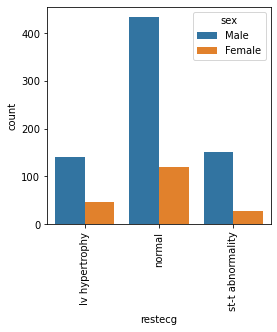

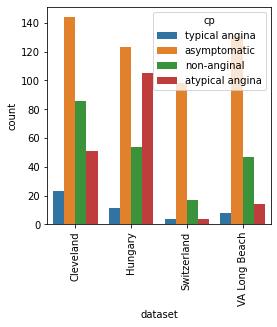

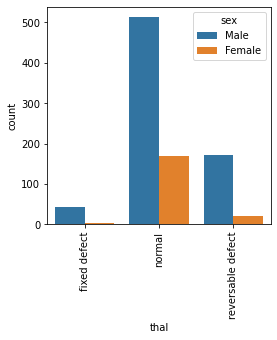

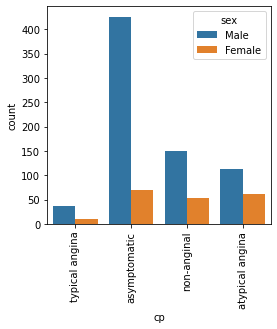

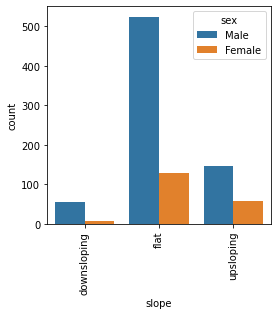

In [8]:
#Identify relationship between attributes

plot.figure(figsize=(4, 4))
sns.countplot(x=data['restecg'], hue=data['sex'], data=data)
plot.xticks(rotation=90)
plot.show()

plot.figure(figsize=(4, 4))
sns.countplot(x=data['dataset'], hue=data['cp'], data=data)
plot.xticks(rotation=90)
plot.show()

plot.figure(figsize=(4, 4))
sns.countplot(x=data['thal'], hue=data['sex'], data=data)
plot.xticks(rotation=90)
plot.show()

plot.figure(figsize=(4, 4))
sns.countplot(x=data['cp'], hue=data['sex'], data=data)
plot.xticks(rotation=90)
plot.show()

plot.figure(figsize=(4, 4))
sns.countplot(x=data['slope'], hue=data['sex'], data=data)
plot.xticks(rotation=90)
plot.show()

-------------------------------------------------------------------------------------------------------------------------------
## Task: Formulate hypothesis based on the research question you want to address.

There are four research questions I want to address:

1) Is there a significant difference in cholesterol levels between patients with and without heart disease?
Null Hypothesis (H0): There is no significant difference in cholesterol levels between patients with and without heart disease.
Alternative Hypothesis (Ha): There is a significant difference in cholesterol levels between patients with and without heart disease.

2) Is there a significant difference in genders between patients with and without heart disease?
Null Hypothesis (H0): There is no significant difference in genders between patients with and without heart disease.
Alternative Hypothesis (Ha): There is a significant difference in genders between patients with and without heart disease.

3) Is there a significant difference in maximum heart rate between patients with and without heart disease?
Null Hypothesis (H0): There is no significant difference in maximum heart rate between patients with and without heart disease.
Alternative Hypothesis (Ha): There is a significant difference in maximum heart rate between patients with and without heart disease.

4) Is there a significant difference in ages between patients with and without heart disease?
Null Hypothesis (H0): There is no significant difference in ages between patients with and without heart disease.
Alternative Hypothesis (Ha): There is a significant difference in ages between patients with and without heart disease.

In [9]:
#Q1)

cholestrolSample1 = data[data['num'] == 0]['chol']
cholestrolSample1.reset_index(drop=True, inplace=True)

cholestrolSample2 = data[data['num'] != 0]['chol']
cholestrolSample2.reset_index(drop=True, inplace=True)

display(cholestrolSample1)
print("\n")
display(cholestrolSample2)

0      233.0
1      250.0
2      204.0
3      236.0
4      354.0
       ...  
406    207.0
407    254.0
408    258.0
409    139.0
410    385.0
Name: chol, Length: 411, dtype: float64

0      286.0
1      229.0
2      268.0
3      254.0
4      203.0
       ...  
504    170.0
505    310.0
506    333.0
507    223.0
508    254.0
Name: chol, Length: 509, dtype: float64

In [10]:
#Q2)

sexSample1 = data[data['num'] == 0]['sex']
sexSample1.reset_index(drop=True, inplace=True)

sexSample2 = data[data['num'] != 0]['sex']
sexSample2.reset_index(drop=True, inplace=True)

display(sexSample1)
print("\n")
display(sexSample2)

0        Male
1        Male
2      Female
3        Male
4      Female
        ...  
406      Male
407      Male
408    Female
409      Male
410      Male
Name: sex, Length: 411, dtype: object

0        Male
1        Male
2      Female
3        Male
4        Male
        ...  
504      Male
505      Male
506    Female
507      Male
508      Male
Name: sex, Length: 509, dtype: object

In [11]:
#Q3)

thalchSample1 = data[data['num'] == 0]['thalch']
thalchSample1.reset_index(drop=True, inplace=True)

thalchSample2 = data[data['num'] != 0]['thalch']
thalchSample2.reset_index(drop=True, inplace=True)

display(thalchSample1)
print("\n")
display(thalchSample2)

0      150.0
1      187.0
2      172.0
3      178.0
4      163.0
       ...  
406     96.0
407    151.0
408     96.0
409    140.0
410    140.0
Name: thalch, Length: 411, dtype: float64

0      108.0
1      129.0
2      160.0
3      147.0
4      155.0
       ...  
504    138.0
505    126.0
506    154.0
507    100.0
508     93.0
Name: thalch, Length: 509, dtype: float64

In [12]:
#Q4)

ageSample1 = data[data['num'] == 0]['age']
ageSample1.reset_index(drop=True, inplace=True)

ageSample2 = data[data['num'] != 0]['age']
ageSample2.reset_index(drop=True, inplace=True)

display(ageSample1)
print("\n")
display(ageSample2)

0      63
1      37
2      41
3      56
4      57
       ..
406    57
407    68
408    51
409    62
410    58
Name: age, Length: 411, dtype: int64

0      67
1      67
2      62
3      63
4      53
       ..
504    62
505    46
506    54
507    55
508    62
Name: age, Length: 509, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------
## Selecting an appropriate statistical test based on the nature of your hypothesis and the type of variables involved.

Statistical tests for the four research questions I want to address:
1) T-test is suitable for comparing cholesterol levels because we are comparing two continuos indepedent variables.<br>
2) Chi-Square Test is used to determine significant difference in genders because we are comparing two discrete variables.<br>
3) T-test is used to determine significant difference in maximum heart rate because we are comparing two continuos indepedent variables.<br>
4) T-test is used to determine significant difference in ages because we are comparing two continuos indepedent variables.<br>

-------------------------------------------------------------------------------------------------------------------------------
## Conducting the hypothesis test using a suitable statistical method or library and interpret the results.

After some research, I found out that most common significance level used in many fields is 0.05 or 5%. It means that if p value is less than 0.05, then the null hypothesis is rejected or the results are statistically significant. If not, then the null hypothesis is not rejected, or the results are not statistically significant.

In [13]:
α = 0.05

_, p = stats.ttest_ind(cholestrolSample1, cholestrolSample2)

if α > p:
    print("\nDifference between the cholestrol groups of people with heart disease and not, are significant! \np:", p)
else:
    print("\nDifference between the cholestrol groups of people with heart disease and not, are not significant! \np:", p)

_, p = stats.ttest_ind(ageSample1, ageSample2)

if α > p:
    print("\nDifference between the age groups of people with heart disease and not, are significant! \np:", p)
else:
    print("\nDifference between the age groups of people with heart disease and not, are not significant! \np:", p)
    
_, p = stats.ttest_ind(thalchSample1, thalchSample2)

if α > p:
    print("\nDifference between the maximum heart rate groups of people with heart disease and not, are significant! \np:", p)
else:
    print("\nDifference between the maximum heart rate groups of people with heart disease and not, are not significant! \np:", p)

sexContingencyTable = pandas.crosstab(sexSample1, sexSample2)
_, p, _, _ = chi2_contingency(sexContingencyTable)

if α > p:
    print("\nDifference between the sex groups of people with heart disease and not, are significant! \np:", p)
else:
    print("\nDifference between the sex groups of people with heart disease and not, are not significant! \np:", p)


Difference between the cholestrol groups of people with heart disease and not, are significant! 
p: 2.0752128341950055e-12

Difference between the age groups of people with heart disease and not, are significant! 
p: 2.2906138697114922e-18

Difference between the maximum heart rate groups of people with heart disease and not, are significant! 
p: 2.6118643749326043e-33

Difference between the sex groups of people with heart disease and not, are not significant! 
p: 0.508973950263351


-------------------------------------------------------------------------------------------------------------------------------
## Calculating confidence intervals for relevant variables to estimate the range within which the true population parameter lies. 

Steps to calculate confidence intervals of continuous variable for patients with heart disease and not.
1) Calculate the mean and standard deviation.<br>
2) Calculate the standard error of the mean.<br>
3) Calculate the critical value associated with your choice of confidence level.<br>
4) Calculate the margin of error by multiplying the standard error to the critical value.<br>
5) Calculate the lower and upper bounds of the confidence interval.

In [14]:
def confidenceIntervals(sample1, sample2):
    #Step 1
    meanSample1 = numpy.mean(sample1)
    meanSample2 = numpy.mean(sample2)

    stdSample1 = numpy.std(sample1)
    stdSample2 = numpy.std(sample2)

    #Step 2
    totalSample1 = len(sample1)
    totalSample2 = len(sample2)
    
    standardErrorSample1 = stdSample1 / math.sqrt(totalSample1)
    standardErrorSample2 = stdSample2 / math.sqrt(totalSample2)

    #Step 3
    confidence = 0.95
    sample1 = totalSample1 - 1
    sample2 = totalSample2 - 1
    critical = t.ppf((1 + confidence) / 2, min(sample1, sample2))

    #Step 4
    marginErrorSample1 = critical * standardErrorSample1
    marginErrorSample2 = critical * standardErrorSample2

    #Step 5
    sample1Lower = meanSample1 - marginErrorSample1
    sample1Upper = meanSample1 + marginErrorSample1
    sample2Lower = meanSample2 - marginErrorSample2
    sample2Upper = meanSample2 + marginErrorSample2

    return sample1Lower, sample1Upper, sample2Lower, sample2Upper

In [15]:
cholS1L, cholS1U, cholS2L, cholS2U = confidenceIntervals(cholestrolSample1, cholestrolSample2)
ageS1L, ageS1U, ageS2L, ageS2U = confidenceIntervals(ageSample1, ageSample2)
thalchS1L, thalchS1U, thalchS2L, thalchS2U = confidenceIntervals(thalchSample1, thalchSample2)

-------------------------------------------------------------------------------------------------------------------------------
## Visualizing the results of hypothesis tests and confidence intervals, using plots or graphs to present the findings effectively.

<AxesSubplot:>

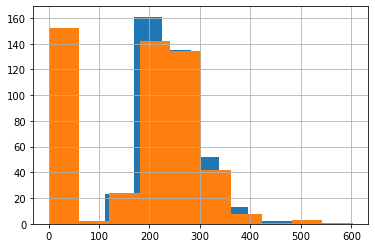

In [16]:
cholestrolSample1.hist()
cholestrolSample2.hist()

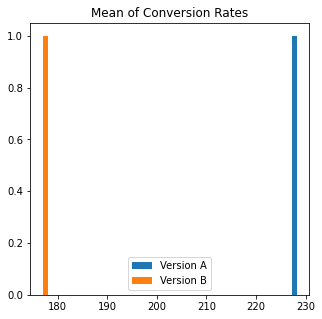

In [17]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(cholestrolSample1), bins = 1, label='Version A')
plot.hist(numpy.mean(cholestrolSample2), bins = 1, label='Version B')

plot.title('Mean of Conversion Rates')
plot.legend()
plot.show()

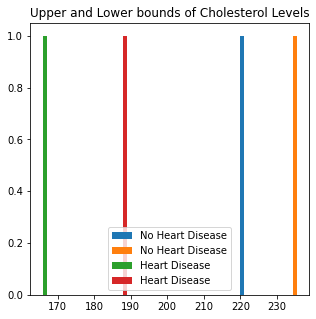

In [18]:
plot.figure(figsize=(5, 5))
plot.hist(cholS1L, bins = 1, label='No Heart Disease')
plot.hist(cholS1U, bins = 1, label='No Heart Disease')
plot.hist(cholS2L, bins = 1, label='Heart Disease')
plot.hist(cholS2U, bins = 1, label='Heart Disease')

plot.title('Upper and Lower bounds of Cholesterol Levels')
plot.legend()
plot.show()

<AxesSubplot:>

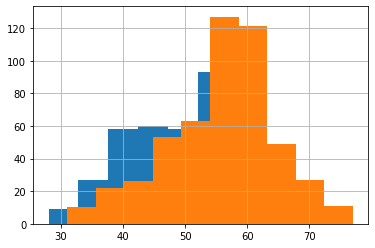

In [19]:
ageSample1.hist()
ageSample2.hist()

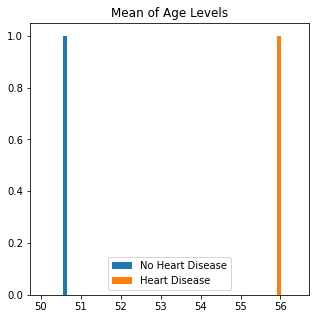

In [20]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(ageSample1), bins = 10, label='No Heart Disease')
plot.hist(numpy.mean(ageSample2), bins = 10, label='Heart Disease')

plot.title('Mean of Age Levels')
plot.legend()
plot.show()

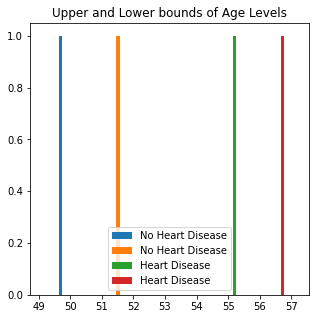

In [21]:
plot.figure(figsize=(5, 5))
plot.hist(ageS1L, bins = 10, label='No Heart Disease')
plot.hist(ageS1U, bins = 10, label='No Heart Disease')
plot.hist(ageS2L, bins = 10, label='Heart Disease')
plot.hist(ageS2U, bins = 10, label='Heart Disease')

plot.title('Upper and Lower bounds of Age Levels')
plot.legend()
plot.show()

<AxesSubplot:>

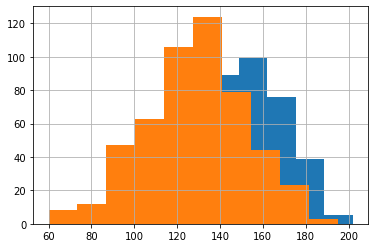

In [22]:
thalchSample1.hist()
thalchSample2.hist()

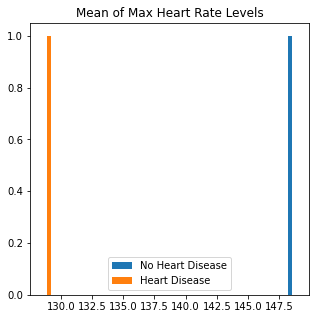

In [23]:
plot.figure(figsize=(5, 5))
plot.hist(numpy.mean(thalchSample1), bins = 3, label='No Heart Disease')
plot.hist(numpy.mean(thalchSample2), bins = 3, label='Heart Disease')

plot.title('Mean of Max Heart Rate Levels')
plot.legend()
plot.show()

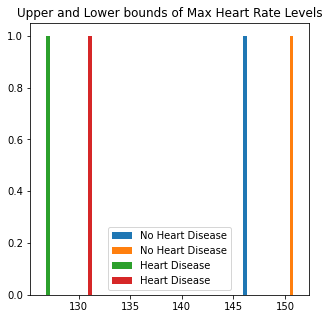

In [24]:
plot.figure(figsize=(5, 5))
plot.hist(thalchS1L, bins = 3, label='No Heart Disease')
plot.hist(thalchS1U, bins = 3, label='No Heart Disease')
plot.hist(thalchS2L, bins = 3, label='Heart Disease')
plot.hist(thalchS2U, bins = 3, label='Heart Disease')

plot.title('Upper and Lower bounds of Max Heart Rate Levels')
plot.legend()
plot.show()

-------------------------------------------------------------------------------------------------------------------------------
## Summary of my findings, including the outcomes of hypothesis tests and the interpretation of confidence intervals. 

I started with loading and understanding the dataset, and its structure. My main objective for this task is hypothesis testing and determining the confidence intervals. I did preprocessing to clean data, like null values, missing values and identified the outliers. I performed exploratory data analysis (EDA) to understand the distribution of variables and identified relationships between different attributes. Then I did some research on hypothesis test, what it is and what we accomplish by doing it. I then conducted the hypothesis test by addressing four questions. I picked cholesterol level, gender, maximum heart rate and ages for my hypothesis. I identified the null and alternative hypothesis associated with each type, which shows us whether there is a significant difference or not between patients with and without heart disease on a particular type. The statistical tests picked depends upon the type of variable, i-e discrete and continuous. For discrete variables, t-test is suitable whereas for continuous variable, chi-square is suitable. After some research, I found out that most common significance level used in many fields is 0.05 or 5%. It means that if p value is less than 0.05, then the null hypothesis is rejected or the results are statistically significant. If not, then the null hypothesis is not rejected, or the results are not statistically significant. P values of cholesterol, age and maximum heart rate showed as that these groups are significant and their null hypothesis is rejected. Then I calculated the confidence intervals for the groups. I didn't perform the confidence intervals for the gender group, because its null hypothesis was accepted meaning there is no significant relationship between gender and heart disease. Steps for calculating intervals for continuous variable contains calculating mean, standard deviation, standard error of mean, critical value, margin of error, and lower and upper bounds of each group. Then I visualized the results of hypothesis and confidence intervals, using histograms. The data distribution, mean, and upper and lower bounds of each group is shown using histograms. Through these results, I can confidently say that cholesterol, age and maximum heart rate can help us identify whether a person has heart disease or not, because I have identified that their is a statistical difference and relationship.